In [1]:
import mujoco
from PIL import Image
from IPython.display import display
import cv2
import importlib
import numpy as np

from robosuite.models.objects import BallObject, BoxObject


[robosuite WARNING] No private macro file found! (__init__.py:7)
[robosuite WARNING] It is recommended to use a private macro file (__init__.py:8)
[robosuite WARNING] To setup, run: python /Users/krispin/miniconda3/envs/robosuite/lib/python3.9/site-packages/robosuite/scripts/setup_macros.py (__init__.py:9)


In [2]:
import brick_envs.wall_env as wall_env

In [3]:
import brick_envs.bricks_base_env as bricks_base_env

In [4]:
importlib.reload(wall_env)
importlib.reload(bricks_base_env)

<module 'brick_envs.bricks_base_env' from '/Users/krispin/Documents/projects/phd-local/projects-phd-local/robosuite-notebooks/brick_envs/bricks_base_env.py'>

In [5]:
import yaml
import os

In [6]:
config_path = bricks_base_env.config_path_default

In [7]:
with open(config_path, mode="rt", encoding="utf-8") as file:
    config = yaml.safe_load(file)

In [8]:
config

{'bricks_base_env_config': {'table': {'full_size': [0.8, 0.8, 0.05],
   'friction': [1.0, 0.005, 0.0001],
   'offset': [0, 0, 0.8]}},
 'single_arm_env_config': {'env_configuration': 'default',
  'initialization_noise': 'default',
  'robots': 'Panda',
  'gripper_types': 'default',
  'use_camera_obs': True,
  'has_renderer': False,
  'has_offscreen_renderer': True,
  'render_camera': 'frontview',
  'render_collision_mesh': False,
  'render_visual_mesh': True,
  'render_gpu_device_id': -1,
  'control_freq': 20,
  'horizon': 1000,
  'ignore_done': False,
  'hard_reset': True,
  'camera_names': 'agentview',
  'camera_heights': 256,
  'camera_widths': 256,
  'camera_depths': False,
  'renderer': 'mujoco'}}

## Wall Env

In [9]:
env = wall_env.WallEnv()

In [10]:
# o = env.step(np.zeros(8))

In [17]:
o = env.reset()

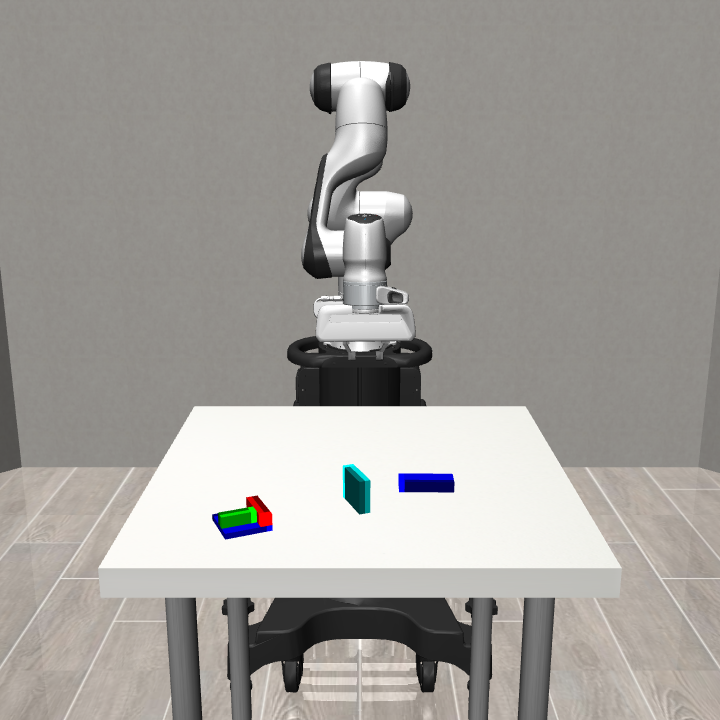

In [20]:
env_img = env.sim.render(720, 720, camera_name="frontview")
display(Image.fromarray(cv2.rotate(env_img, cv2.ROTATE_180)))

In [19]:
env.go_to_step(1)

In [17]:
env.brick_placements

{'cube_1_joint0': array([0.21052953, 0.29323035, 0.82      , 0.58717798, 0.        ,
        0.        , 0.80945785]),
 'cube_2_joint0': array([ 0.06706162,  0.1699027 ,  0.82      , -0.13052211,  0.        ,
         0.        ,  0.9914454 ]),
 'cube_3_joint0': array([0.26569085, 0.03519814, 0.815     , 0.95663503, 0.        ,
        0.        , 0.29128923]),
 'cube_4_joint0': array([ 0.21549227, -0.29233924,  0.82      , -0.18906204,  0.        ,
         0.        ,  0.98196514]),
 'cube_5_joint0': array([ 0.2331082 ,  0.20868629,  0.84      , -0.14964332,  0.        ,
         0.        ,  0.98874005])}

In [13]:
env._assemble_bricks(2,(3,3),0,0,3)
env._assemble_bricks(2,(1,0),1,0,0)

In [12]:
for i in range(50):
    o = env.step(np.zeros(8))

In [27]:
[0,0] + [1]

[0, 0, 1]

## Test Texture

In [32]:
# add object to env

def reinit_env(env):
    # Load the model
    # self._load_model()
    
    # Initialize the simulation
    env._initialize_sim()

    # initializes the rendering
    env.initialize_renderer()

    # Run all further internal (re-)initialization required
    env._reset_internal()

    # Load observables
    if hasattr(env.viewer, "_setup_observables"):
        env._observables = env.viewer._setup_observables()
    else:
        env._observables = env._setup_observables()
        
    # check if viewer has get observations method and set a flag for future use.
    env.viewer_get_obs = hasattr(env.viewer, "_get_observations")

In [42]:
from robosuite.utils.mjcf_utils import CustomMaterial

In [46]:
env = wall_env.WallEnv()
tex_attrib = {
    "type": "cube",
    "builtin": "checker"
}
mat_attrib = {
    "texrepeat": "1 1",
    "specular": "0.4",
    "shininess": "0.1",
}
test_cube_material = CustomMaterial(
    texture="WoodRed",
    tex_name="redwood",
    mat_name="redwood_mat",
    tex_attrib=tex_attrib,
    mat_attrib=mat_attrib,
)
tex_attrib = {
    "type": "cube",
}
mat_attrib = {
    "texrepeat": "1 1",
    "specular": "0.4",
    "shininess": "0.1",
}
redwood = CustomMaterial(
    texture="WoodRed",
    tex_name="redwood",
    mat_name="redwood_mat",
    tex_attrib=tex_attrib,
    mat_attrib=mat_attrib,
)
test_cube = BoxObject(
    name="test_cube",
    density=200,
    size=[0.04, 0.04, 0.04],
    # rgba=(0,0,1,1),
    material=redwood,
)
test_cube_obj = test_cube.get_obj()
test_cube_obj.set('pos', f'0.0 0.0 {0.8 + 0.2}')
env.model.worldbody.append(test_cube_obj)
reinit_env(env)

ValueError: Error: material 'test_cube_redwood_mat' not found in geom 88
Object name = test_cube_g0_vis, id = 88, line = 366, column = -1